In [477]:
from brian2 import *

start_scope()
prefs.codegen.target = "numpy"
N = 30

In [478]:
#LIF
tau = 10*ms
Vt = -50*mV
Vr = -65*mV
El = -65*mV
R = 10*Mohm
I1 = 2.5*nA

eqs_LIF = '''
        dV/dt = (-(V-El)  +R*I1)/tau : volt
    '''
G1 = NeuronGroup(N, model = eqs_LIF, threshold = 'V>Vt', reset = 'V = Vr', method = 'exact')
G1.V = El

In [479]:
#FHN
a = 0.7
b = 0.8
ep = 0.08
I = 0.5

#vth = -0.03
#vr = 5

eqs = '''
        dv/dt = (v - v**3/3 - w + I)/ms : 1
        dw/dt = (ep*(v + a - b*w))/ms : 1
      '''

G2 = NeuronGroup(N, model = eqs, method = 'euler')
G2.v = -1
G2.w = 1

In [480]:
def visualise_connectivity(S):
    Ns = len(S.source)
    Nt = len(S.target)
    figure(figsize=(10, 4))
    subplot(121)
    plot(zeros(Ns), arange(Ns), 'ok', ms=10)
    plot(ones(Nt), arange(Nt), 'ok', ms=10)
    for i, j in zip(S.i, S.j):
        plot([0, 1], [i, j], '-k')
    xticks([0, 1], ['Source', 'Target'])
    ylabel('Neuron index')
    xlim(-0.1, 1.1)
    ylim(-1, max(Ns, Nt))
    subplot(122)
    plot(S.i, S.j, 'ok')
    xlim(-1, Ns)
    ylim(-1, Nt)
    xlabel('Source neuron index')
    ylabel('Target neuron index')

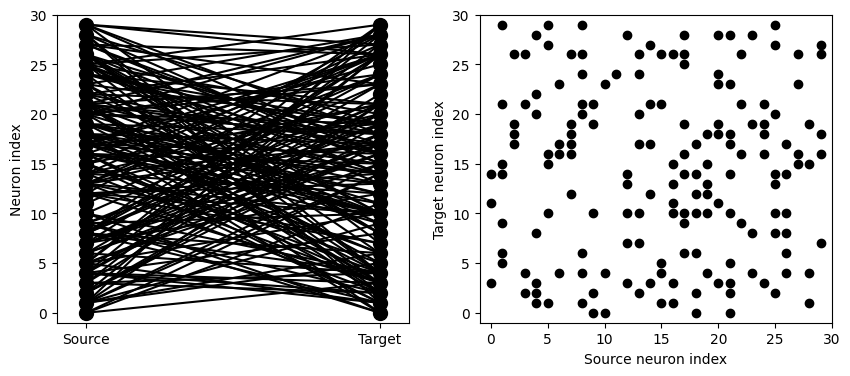

In [481]:
S = Synapses(G1, G2, on_pre = 'v_post += 0.02')
S.connect(condition = 'i!= j', p = 0.2)
visualise_connectivity(S)

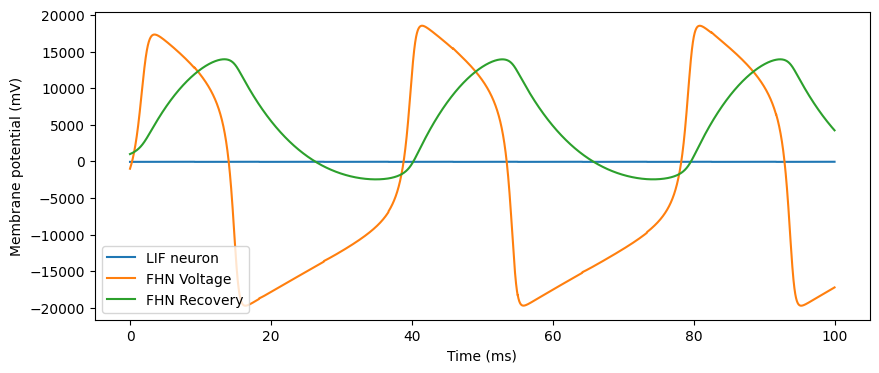

In [482]:
M1 = StateMonitor(G1, 'V', record=True)
M2 = StateMonitor(G2, ['v', 'w'], record=True)
defaultclock.dt = 0.01*ms
run(100*ms)

figure(figsize = (10,4))
plot(M1.t/ms, M1.V[0]/mV, label='LIF neuron')
plot(M2.t/ms, M2.v[0]/mV, label='FHN Voltage')
plot(M2.t/ms, M2.w[0]/mV, label = 'FHN Recovery')
xlabel('Time (ms)')
ylabel('Membrane potential (mV)')
legend()

In [428]:
spikemon_LIF = SpikeMonitor(G1)
spikemon_FHN = SpikeMonitor(G2)

run(200*ms)
figure(figsize = (6,4))
plot(spikemon_LIF.t/ms, spikemon_LIF.i, 'b.', label = 'LIF Neuron')
plot(spikemon_FHN.t/ms, spikemon_FHN.i, 'r.', label = 'FitHugh Nagumo Neuron')
xlabel('Time(ms)')
ylabel('Neuron index')
legend()

ValueError: Recorded group 'neurongroup_6' does not define an event 'spike'. Did you forget to set a 'threshold'?